# Airline Delay Predictor

In [1]:
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

In [2]:
flights = pd.read_csv("SEMINAR_FINAL_DATASET.csv")
flights

,Aircraft_id,flight_no,delay_time,weather_cs,ATC_cs,maintenance_cs,sociopolitical_cs,total
0,1,1,50,1,0,1,0,2
1,2,2,15,0,1,0,0,1
2,3,3,150,0,1,1,1,3
3,4,4,50,1,0,1,0,2
4,5,5,15,0,1,0,0,1
...,...,...,...,...,...,...,...,...
95,96,96,15,0,0,0,0,0
96,97,97,150,1,1,1,0,3
97,98,98,15,0,0,0,1,1
98,99,99,150,1,1,1,0,3


In [3]:
import matplotlib.pyplot as plt

# Train-Test Splitting

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(flights, test_size = 0.2, random_state = 42)
print(f"rows in train set: {len(train_set)}\nrows in test set:{len(test_set)}")

rows in train set: 80
rows in test set:20


In [5]:
flights = train_set.copy()

# Looking For Correlations

In [6]:
corr_matrix = flights.corr()

In [7]:
corr_matrix['delay_time'].sort_values(ascending=False)

delay_time           1.000000
total                0.914431
ATC_cs               0.783303
maintenance_cs       0.778352
weather_cs           0.698722
Aircraft_id          0.093281
flight_no            0.093281
sociopolitical_cs   -0.119613
Name: delay_time, dtype: float64

<Axes: xlabel='total', ylabel='delay_time'>

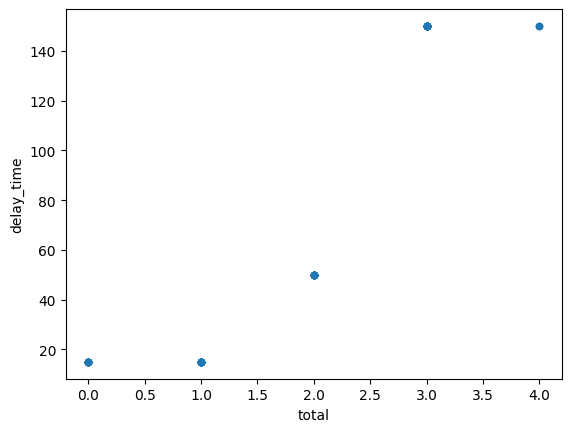

In [8]:
flights.plot(kind="scatter", x="total", y="delay_time",alpha=0.9)

# Dividing Features and Labels

In [9]:
flights = train_set.drop("delay_time",axis=1)
flight_labels = train_set["delay_time"].copy()
flight_tr = pd.DataFrame(flights, columns=flights.columns)
flights

,Aircraft_id,flight_no,weather_cs,ATC_cs,maintenance_cs,sociopolitical_cs,total
55,56,56,1,1,1,0,3
88,89,89,1,1,1,0,3
26,27,27,0,0,1,0,1
42,43,43,0,0,0,0,0
69,70,70,0,0,0,0,0
...,...,...,...,...,...,...,...
60,61,61,0,0,0,1,1
71,72,72,1,1,1,0,3
14,15,15,0,1,1,0,2
92,93,93,0,0,0,0,0


# Selecting a desired Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn import tree
model = RandomForestRegressor()
model.fit(flight_tr,flight_labels)

RandomForestRegressor()

In [11]:
some_data = flights.iloc[:4]
some_data

,Aircraft_id,flight_no,weather_cs,ATC_cs,maintenance_cs,sociopolitical_cs,total
55,56,56,1,1,1,0,3
88,89,89,1,1,1,0,3
26,27,27,0,0,1,0,1
42,43,43,0,0,0,0,0


In [12]:
some_labels = flight_labels.iloc[:4]

In [13]:
prep_data = pd.DataFrame(some_data, columns=some_data.columns)

In [14]:
model.predict(prep_data)

array([150., 150.,  15.,  15.])

In [15]:
list(some_labels)

[150, 150, 15, 15]

# Testing the model

In [16]:
test_set_1 =pd.read_csv("seminar_test_data.csv")

X_test = test_set_1.drop("delay_time", axis=1)
Y_test = test_set_1["delay_time"].copy()
X_test_prep = pd.DataFrame(X_test, columns=X_test.columns)
final_pred = model.predict(X_test_prep)
print(final_pred,list(Y_test))

[150.  15. 150.  50.  50.  15. 150.  15.  15.  15. 150. 150.  50.  15.
 150.  15.  50. 150.  50.  15.] [150, 25, 150, 50, 50, 15, 150, 15, 15, 20, 150, 150, 60, 0, 150, 15, 50, 15, 60, 15]


In [17]:
from sklearn.metrics import accuracy_score
acc_m = accuracy_score(Y_test,final_pred)
acc_m

0.7